C:\Users\mpm51\AppData\Local\Temp\ipykernel_40244\1445740465.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.drop(['전출지별'], axis=1, inplace=True)
C:\Users\mpm51\AppData\Local\Temp\ipykernel_40244\1445740465.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)


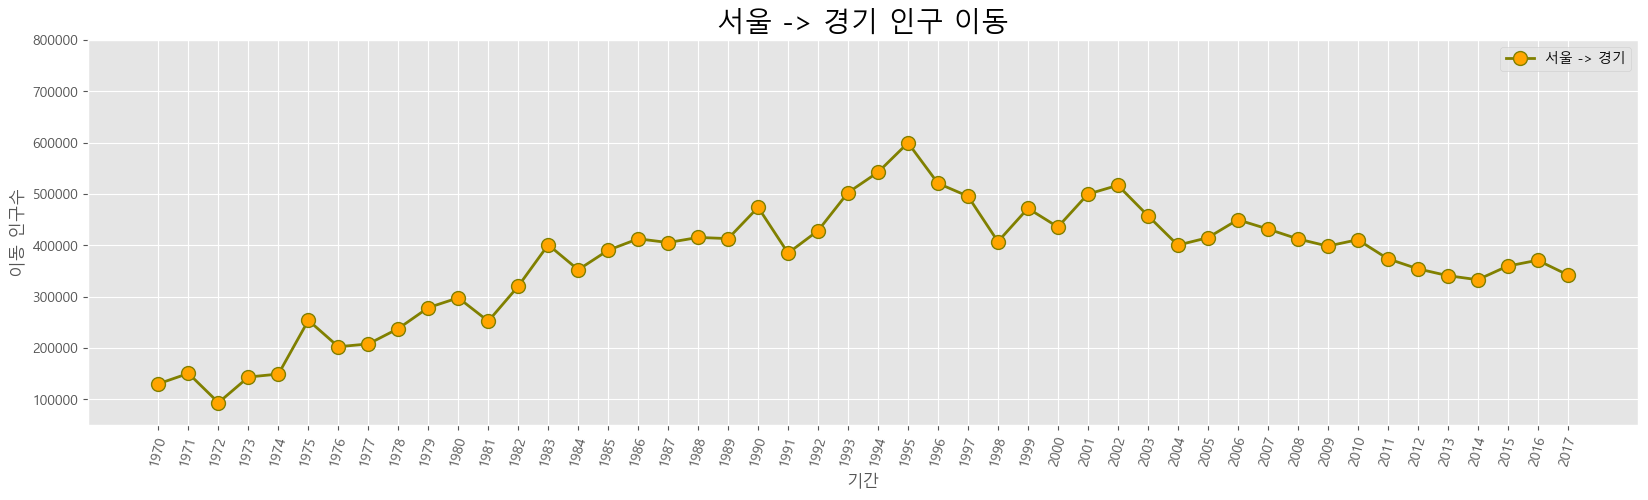

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

df = df.ffill()

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul.drop(['전출지별'], axis=1, inplace=True)
df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데인터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정, ggplot은 스타일 이름
plt.style.use('ggplot')

# 그림 사이즈 늘리기
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1,1,1) # 행의 크기, 열의 크기, 서브플롯 순서

# axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one, marker = 'o', markerfacecolor = 'orange', markersize = 10,
        color = 'olive', linewidth = 2, label = '서울 -> 경기')
ax.legend(loc = 'best')

# y축 범위 지정(최솟값, 최댓값)
ax.set_ylim(50000,800000)

# 차트 제목 추가
ax.set_title('서울 -> 경기 인구 이동', size = 20)

# 축 이름 추가
ax.set_xlabel('기간', size = 12)
ax.set_ylabel('이동 인구수', size = 12)

# 축 눈금 위치 지정
ax.set_xticks(sr_one.index)

# 축 눈금 레이블 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotation = 75)

# 축 눈금 레이블 크기
ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10)

plt.show()